<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_regressao_scale_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Aprendizado Supervisionado e Regressão Linear `statsmodels`**

Neste laboratório:

1. Aplique os modelos de regressão linear com statsmodel e scikit-learn
2. Entenda os efeitos da normalização
3. Avalie o uso de diferentes preditores e seu impacto sobre a variável objetivo



In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Caso: **Estimando o preço de imóveis**

Empregue modelos de regressão simples e múltipla para estimar o preço dos imóveis.


In [123]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


## Exploração inicial dos dados

In [124]:
df.describe()

,areaM2,suites,dormitorios,banheiros,vagas,preco
count,3741.000000,3741.000000,3741.000000,3741.000000,3741.000000,3.741000e+03
mean,140.343758,1.700882,2.946271,3.095429,2.225341,1.553746e+06
std,60.051791,0.994945,0.759292,1.372859,1.000940,1.073607e+06
min,20.000000,1.000000,1.000000,1.000000,1.000000,2.800000e+05
25%,94.000000,1.000000,3.000000,2.000000,1.000000,8.500000e+05
50%,130.000000,1.000000,3.000000,3.000000,2.000000,1.200000e+06
75%,180.000000,2.000000,3.000000,4.000000,3.000000,1.880000e+06
max,299.000000,6.000000,6.000000,9.000000,5.000000,8.000000e+06


In [125]:
df.isnull().sum()

,0
bairro,0
areaM2,0
suites,0
dormitorios,0
banheiros,0
vagas,0
preco,0


In [126]:
df = df.drop(columns='bairro')
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


# Q1.

Considere somente os dados numéricos, sem transformações. Qual o R2 obtido da regressão linear para estimativa do preço dos imóveis?

In [127]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + banheiros + vagas', data=df)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:38:33   Log-Likelihood:                -55098.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3735   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1713.8448   4.06e+04      0.042      

In [128]:
import statsmodels.api as sm

numerical_cols = ['areaM2', 'suites', 'dormitorios', 'banheiros', 'vagas']
X = df[numerical_cols]
y = df['preco']

# Add a constant
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:38:33   Log-Likelihood:                -55098.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3735   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1713.8448   4.06e+04      0.042      

# Q2.

Considere somente os dados numéricos, sem transformações. Quais atributos preditores são significativos?

In [129]:
pd.DataFrame(lm.summary().tables[1].data[1::], columns=lm.summary().tables[1].data[0]).set_index('')

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1713.8448,4.06e+04,0.042,0.966,-7.78e+04,8.12e+04
areaM2,1.05e+04,274.850,38.206,0.000,9962.080,1.1e+04
suites,2.128e+05,1.64e+04,12.996,0.000,1.81e+05,2.45e+05
dormitorios,-3.046e+05,1.77e+04,-17.210,0.000,-3.39e+05,-2.7e+05
banheiros,-1.681e+04,1.04e+04,-1.622,0.105,-3.71e+04,3507.003
vagas,2.992e+05,1.6e+04,18.704,0.000,2.68e+05,3.31e+05


In [130]:
pd.DataFrame(lm.pvalues).sort_values(by=0)

,0
areaM2,6.816549e-270
vagas,1.082706e-74
dormitorios,6.172685e-64
suites,8.361773e-38
banheiros,1.048334e-01
Intercept,9.662901e-01


In [131]:
pvalues = pd.DataFrame(lm.pvalues)
pvalues.columns = ['pvalues']
pvalues['significativo'] = pvalues['pvalues'] < 0.05
pvalues = pvalues.sort_values(by='pvalues', ascending=False)
pvalues

,pvalues,significativo
Intercept,9.662901e-01,False
banheiros,1.048334e-01,False
suites,8.361773e-38,True
dormitorios,6.172685e-64,True
vagas,1.082706e-74,True
areaM2,6.816549e-270,True


# Q3.

Considere somente os dados numéricos, sem transformações. Qual o R2 obtido somente com os coeficientes significativos?

In [132]:
import statsmodels.formula.api as sm

lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                        0.00
Time:                        22:38:33   Log-Likelihood:                         -55099.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3737   BIC:                                  1.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Q4.

Considere somente os dados numéricos, sem transformações. Considerando somente os coeficientes significativos da regressão linear, qual o preço estimado de um imóvel de 134 m2, uma suite, 4 dormitórios e 2 vagas de garagem?


In [133]:
df_case = pd.DataFrame()
df_case['areaM2'] = [134]
df_case['suites'] = [1]
df_case['dormitorios'] = [4]
df_case['vagas'] = [2]

df_case


,areaM2,suites,dormitorios,vagas
0,134,1,4,2


In [134]:
preco = lm.predict(df_case)
print()
print(f'Preço estimado: {preco[0]:.2f}')


Preço estimado: 949268.27


ou

In [135]:
lm.predict({'areaM2': [134], 'suites': [1], 'dormitorios': [4], 'vagas': [2]})

,0
0,949268.265645


# Q5.

Podemos afirmar que o atributo que influencia mais o preço em termos absolutos é o número de dormitórios (Verdadeiro/Falso)?

# Scale 1

# Q6.

Normalize os dados, incluindo o preço, apenas dividindo pelo valor máximo de cada atributo e refaça a regressão linear somente os preditores significativos. Qual a estimativa do preço agora?

In [136]:
df_scaled = df / df.max()

# df_scaled = df.drop(columns=['preco']) / df.drop(columns=['preco']).max()
# df_scaled['preco'] = df['preco']

df_scaled.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,0.107023,0.166667,0.166667,0.111111,0.2,0.061250
1,0.525084,0.333333,0.333333,0.222222,0.4,0.397500
2,0.685619,0.333333,0.500000,0.333333,0.6,0.237500
3,0.645485,0.500000,0.500000,0.333333,0.6,0.445625
4,0.387960,0.166667,0.500000,0.222222,0.4,0.200625


In [137]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df_scaled)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                        0.00
Time:                        22:38:33   Log-Likelihood:                          4363.9
No. Observations:                3741   AIC:                                     -8720.
Df Residuals:                    3737   BIC:                                     -8695.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [138]:
df_case

,areaM2,suites,dormitorios,vagas
0,134,1,4,2


In [139]:
df.drop(columns=['preco','banheiros']).max().to_frame().transpose()

,areaM2,suites,dormitorios,vagas
0,299,6,6,5


In [140]:
df_case / df.drop(columns=['preco','banheiros']).max().to_frame().transpose()

,areaM2,suites,dormitorios,vagas
0,0.448161,0.166667,0.666667,0.4


In [141]:
df_case_scaled = df_case / df.drop(columns=['preco','banheiros']).max().to_frame().transpose()

In [142]:
preco = lm.predict(df_case_scaled) * df.preco.max()
# preco = lm.predict(df_case_scaled)
print()
print(f'Preço estimado: {preco[0]:.2f}')


Preço estimado: 949268.27


# Q7.

Qual atributo influencia mais no preço dos imóveis segundo seu modelo agora?

In [143]:
coef = pd.DataFrame(lm.params)
coef.columns = ['coef']
coef['abs_coef'] = np.abs(coef['coef'])
coef = coef.sort_values(by='abs_coef', ascending=False)
coef


,coef,abs_coef
areaM2,0.391362,0.391362
dormitorios,-0.234329,0.234329
vagas,0.185301,0.185301
suites,0.152185,0.152185


In [144]:
coef.nlargest(1,'abs_coef')

,coef,abs_coef
areaM2,0.391362,0.391362


In [145]:
df = df.drop(columns='banheiros')
df.head()

,areaM2,suites,dormitorios,vagas,preco
0,32,1,1,1,490000
1,157,2,2,2,3180000
2,205,2,3,3,1900000
3,193,3,3,3,3565000
4,116,1,3,2,1605000


# Scale 2

# Qa.

Verifique que os mesmos resultados podem ser obtidos normalizando apenas as variáveis preditoras.




In [146]:
# já está acima comentado

# Scale 3

# Qb.

Verifique agora para o esquema de normalização **MinMAx**  (pode fazer sem empregar o scikit-learn) e refaça a regressão linear com os preditores significativos. Qual a estimativa do preço agora? Qual a sua conclusão?


In [147]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
scaler_minmax = scaler_minmax.fit(df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']])
df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']] = scaler_minmax.transform(df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']])

# StandardScaler
scaler_standard = StandardScaler()
df_stdscale = df.copy()
scaler_standard = scaler_standard .fit(df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']])
df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']] = scaler_standard.transform(df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']])


In [148]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df_minmax)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              7805.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                        0.00
Time:                        22:38:34   Log-Likelihood:                         -55188.
No. Observations:                3741   AIC:                                  1.104e+05
Df Residuals:                    3737   BIC:                                  1.104e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [149]:
df_case_minmax = scaler_minmax.transform(df_case)
df_case_minmax

array([[0.40860215, 0.        , 0.6       , 0.25      ]])

In [150]:
df_case_minmax = pd.DataFrame(df_case_minmax, columns=['areaM2', 'suites', 'dormitorios', 'vagas'])
df_case_minmax

,areaM2,suites,dormitorios,vagas
0,0.408602,0.0,0.6,0.25


In [151]:
preco = lm.predict(df_case_minmax)

print()
print(f'Preco estimado: {preco[0]:.2f}')


Preco estimado: 1085921.06


A normalização das variáveis preditoras pode afetar as previsões de um modelo de regressão linear, embora o impacto direto nas previsões em si não seja significativo. De qualquer modo isso pode ser um problema em muitos casos, de diferenças significativas, quando temos os dados sem algumas atender algunmas premissas do modelo, como a presença de outliers, heterocedasticidade etc. Veja, por exemplo, no caso desses dados a normalização standard scale.

# Q9.

Faça um gráfico dos dados para verificar os aspectos de outliers e homocedasticidade dos dados.


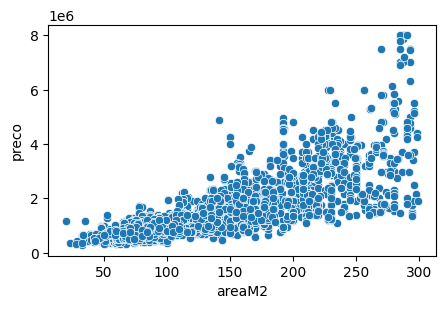

In [152]:
plt.figure(figsize=(5,3))

sns.scatterplot(x=df.areaM2, y=df.preco)
plt.show()


In [158]:
np.var(df.preco), np.var(np.log(df.preco))

(1152324795491.0938, 0.33154220111110566)

In [159]:
np.std(df.preco), np.std(np.log(df.preco))

(1073463.9237026523, 0.5757970138087777)

In [160]:
df['areaM2_range'] = pd.cut(df['areaM2'], bins=10)
display(df['areaM2_range'].value_counts().sort_index())

,count
areaM2_range,
"(19.721, 47.9]",69
"(47.9, 75.8]",420
"(75.8, 103.7]",734
"(103.7, 131.6]",709
"(131.6, 159.5]",528
"(159.5, 187.4]",448
"(187.4, 215.3]",311
"(215.3, 243.2]",255
"(243.2, 271.1]",165


/tmp/ipython-input-1874268611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(df.groupby('areaM2_range').preco.var().values)
/tmp/ipython-input-1874268611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(np.log(df.groupby('areaM2_range').preco.var().values))


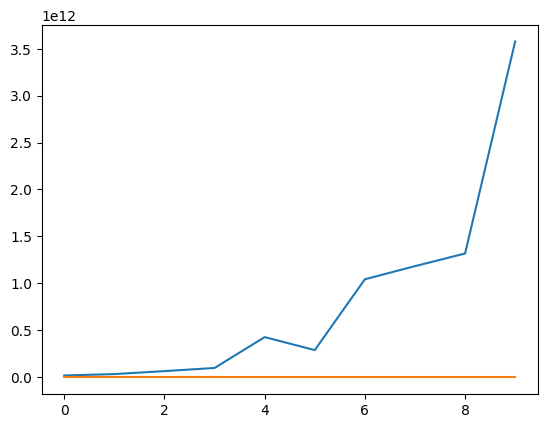

In [177]:
plt.plot(df.groupby('areaM2_range').preco.var().values)
plt.plot(np.log(df.groupby('areaM2_range').preco.var().values))
plt.show()

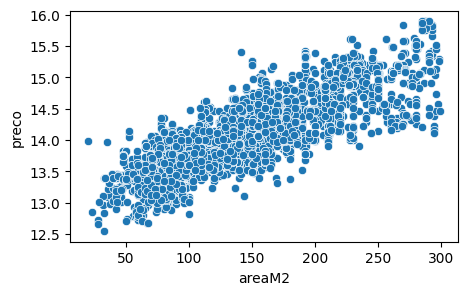

In [157]:
plt.figure(figsize=(5,3))

sns.scatterplot(x=df.areaM2, y=np.log(df.preco))
plt.show()


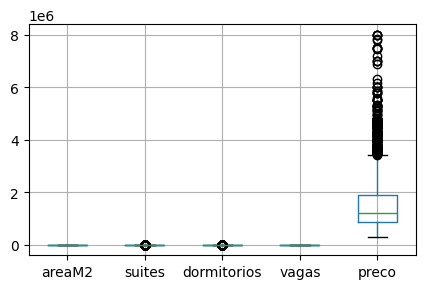

In [113]:
plt.figure(figsize=(5,3))

df.boxplot(figsize=(10,6))
plt.show()


In [114]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df)
lm = lm.fit()
print(lm.summary())

preco = lm.predict(df_case)
print()
print(f'Preco estimado: {preco[0]:.2f}')

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                        0.00
Time:                        21:29:38   Log-Likelihood:                         -55099.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3737   BIC:                                  1.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Q10.

Construa o mesmo modelo, com os 4 preditores significativos, com o Scikit-learn. Por que diferente?

In [115]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [116]:
df_case = pd.DataFrame()
df_case['areaM2'] = [134]
df_case['suites'] = [1]
df_case['dormitorios'] = [4]
df_case['vagas'] = [2]

df_case

,areaM2,suites,dormitorios,vagas
0,134,1,4,2


In [117]:
X = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']

model = LinearRegression() # fit_intercept=False) # set fit_intercept to False
model.fit(X, y)

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

print(model.coef_, model.intercept_, model.score(X, y))

Preço estimado (scikit-learn): 950278.00
[  10468.46173907  202771.70454038 -311340.86561812  296751.59991048] -3407.312060851371 0.6845689083685004


In [118]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas', data=df)
lm = lm.fit()
print(lm.summary())

preco = lm.predict(df_case)
print()
print(f'Preço estimado (scikit-learn): {preco[0]:.2f}')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2027.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:29:40   Log-Likelihood:                -55099.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3736   BIC:                         1.102e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3407.3121   4.04e+04     -0.084      

# Q11.

Faça o modelo sm.ols incluindo todas as variáveis preditoras, mesmo o bairro que é não numérico, e veja como a api se comporta para criar o modelo. Faça a previsão para o mesmo case considerando o bairro de `vila-mariana`. Observe as variáveis preditoras no summary do modelo. O que aconteceu?

O `statsmodels` faz automaticamente o *hot-encode* das variáveis categóricas.

In [119]:
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [120]:
df.bairro.value_counts()

,count
bairro,
vila-mariana,1714
paraiso,802
vila-nova-conceicao,789
vila-sonia,307
morumbi,129


In [121]:
lm = sm.ols(formula='preco ~ bairro + areaM2 + suites + dormitorios + vagas', data=df)
lm = lm.fit()
print(lm.summary())

df_case['bairro'] = 'vila-mariana'

preco = lm.predict(df_case)
print()
print(f'Preco estimado: {preco[0]:.2f}')

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1812.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:29:42   Log-Likelihood:                -54290.
No. Observations:                3741   AIC:                         1.086e+05
Df Residuals:                    3732   BIC:                         1.087e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     